In [35]:
import numpy as np
import pandas as pd

import yfinance as yf
import plotly.graph_objs as go

In [146]:
#Getting Stock Info
BAC = yf.download(tickers='BAC', period='1d', interval='1m')
C = yf.download(tickers='C', period='1d', interval='1m')
GS = yf.download(tickers='GS', period='1d', interval='1m')
JPM = yf.download(tickers='JPM', period='1d', interval='1m')
MS = yf.download(tickers='MS', period='1d', interval='1m')
WFC = yf.download(tickers='WFC', period='1d', interval='1m')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [147]:
#Combining Info
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
data = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 1, keys = tickers,)
data.columns.names = ['Bank Ticker', 'Stock Info']
data.head()

Bank Ticker                      BAC                                   \
Stock Info                      Open       High        Low      Close   
Datetime                                                                
2023-01-30 09:30:00-05:00  35.209999  35.309898  35.180000  35.279999   
2023-01-30 09:31:00-05:00  35.279999  35.348000  35.270000  35.340000   
2023-01-30 09:32:00-05:00  35.340000  35.380001  35.340000  35.360001   
2023-01-30 09:33:00-05:00  35.360100  35.389999  35.349998  35.384998   
2023-01-30 09:34:00-05:00  35.384998  35.435001  35.380001  35.404999   

Bank Ticker                                           C                        \
Stock Info                 Adj Close  Volume       Open       High        Low   
Datetime                                                                        
2023-01-30 09:30:00-05:00  35.279999  571272  51.439999  51.520000  51.360001   
2023-01-30 09:31:00-05:00  35.340000   80437  51.509998  51.650002  51.509998   
2023-01-30 09:32:00-05:00  35.360001   89900  51.610001  51.630001  51.540001   
2023-01-30 09:33:00-05:00  35.384998   51314  51.549999  51.639999  51.533100   
2023-01-30 09:34:00-05:00  35.404999   88650  51.625000  51.674999  51.610001   

Bank Ticker                           ...         MS                        \
Stock Info                     Close  ...        Low      Close  Adj Close   
Datetime                              ...                                    
2023-01-30 09:30:00-05:00  51.520000  ...  95.000000  95.150002  95.150002   
2023-01-30 09:31:00-05:00  51.580002  ...  95.110001  95.110001  95.110001   
2023-01-30 09:32:00-05:00  51.549999  ...  94.919998  95.154999  95.154999   
2023-01-30 09:33:00-05:00  51.634998  ...  95.139999  95.470001  95.470001   
2023-01-30 09:34:00-05:00  51.650002  ...  95.330002  95.404999  95.404999   

Bank Ticker                              WFC                                   \
Stock Info                 Volume       Open       High        Low      Close   
Datetime                                                                        
2023-01-30 09:30:00-05:00   12874  45.910000  45.910000  45.810001  45.849998   
2023-01-30 09:31:00-05:00    9847  45.900002  45.900002  45.860001  45.869999   
2023-01-30 09:32:00-05:00  193003  45.900002  45.980000  45.900002  45.930000   
2023-01-30 09:33:00-05:00   13916  45.930000  46.009998  45.930000  46.009998   
2023-01-30 09:34:00-05:00   16375  46.005001  46.230000  45.980000  46.209999   

Bank Ticker                                   
Stock Info                 Adj Close  Volume  
Datetime                                      
2023-01-30 09:30:00-05:00  45.849998   29828  
2023-01-30 09:31:00-05:00  45.869999    1762  
2023-01-30 09:32:00-05:00  45.930000    4336  
2023-01-30 09:33:00-05:00  46.009998  155679  
2023-01-30 09:34:00-05:00  46.209999  172881  

[5 rows x 36 columns]

In [66]:
#Max Close - Simple
for ticker in tickers:
    print(ticker, data[ticker]['Close'].max())

BAC 35.51499938964844
C 51.67100143432617
GS 361.3800964355469
JPM 139.97030639648438
MS 96.13500213623047
WFC 46.47999954223633


In [64]:
#Max Close - Using xs
data.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     35.514999
C       51.671001
GS     361.380096
JPM    139.970306
MS      96.135002
WFC     46.480000
dtype: float64

In [148]:
returns = pd.DataFrame()

In [149]:
for ticker in tickers:
    returns[ticker + ' Return'] = data[ticker]['Close'].pct_change()

returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Datetime,,,,,,
2023-01-30 09:30:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-30 09:31:00-05:00,0.001701,0.001165,0.000424,0.001049,-0.000420,0.000436
2023-01-30 09:32:00-05:00,0.000566,-0.000582,0.000395,0.000788,0.000473,0.001308
2023-01-30 09:33:00-05:00,0.000707,0.001649,0.002286,0.001360,0.003310,0.001742
2023-01-30 09:34:00-05:00,0.000565,0.000291,-0.000113,-0.000286,-0.000681,0.004347


In [76]:
import seaborn as sns

In [80]:
#sns.pairplot(returns[1:])

In [158]:
#Time with worst returns
returns.idxmin()

BAC Return   2023-01-30 09:54:00-05:00
C Return     2023-01-30 09:54:00-05:00
GS Return    2023-01-30 10:18:00-05:00
JPM Return   2023-01-30 09:42:00-05:00
MS Return    2023-01-30 09:41:00-05:00
WFC Return   2023-01-30 09:36:00-05:00
dtype: datetime64[ns, America/New_York]

In [157]:
#Time with best returns
returns.idxmax()

BAC Return   2023-01-30 09:45:00-05:00
C Return     2023-01-30 09:45:00-05:00
GS Return    2023-01-30 10:14:00-05:00
JPM Return   2023-01-30 09:45:00-05:00
MS Return    2023-01-30 09:33:00-05:00
WFC Return   2023-01-30 09:34:00-05:00
dtype: datetime64[ns, America/New_York]

In [155]:
#Standard Deviation
returns.std()

BAC Return    0.000563
C Return      0.000561
GS Return     0.000784
JPM Return    0.000462
MS Return     0.000621
WFC Return    0.000672
dtype: float64

In [156]:
#Standard Deviation for specific Time Frame
returns.loc['2023-01-30 09:30:00-05:00':'2023-01-30 10:30:00-05:00'].std()

BAC Return    0.000829
C Return      0.000797
GS Return     0.001116
JPM Return    0.000682
MS Return     0.000963
WFC Return    0.001002
dtype: float64

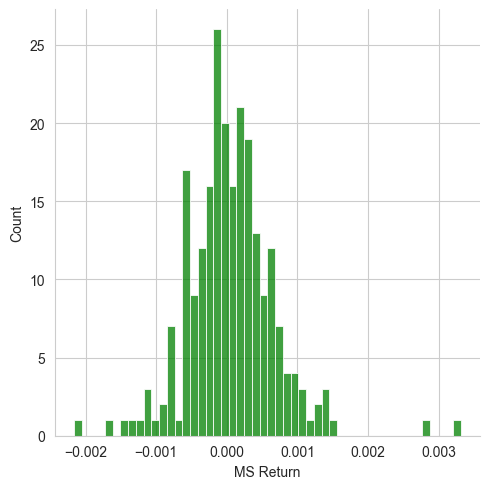

In [154]:
#Creating a displot
sns.displot(returns['MS Return'], color='green', bins=50)

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

In [102]:
#Line Plot for multiple stocks (Time Data needs to be in years and smth else)
#for ticker in tickers:
    #data[ticker]['Close'].plot(label=ticker, figsize=(12,4))

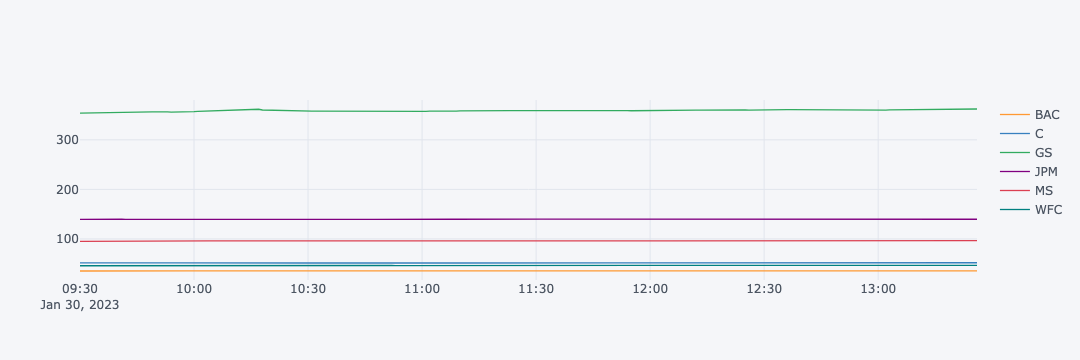

In [151]:
#Line Plot for multiple stocks
data.xs(key='Close', axis=1, level='Stock Info').iplot()

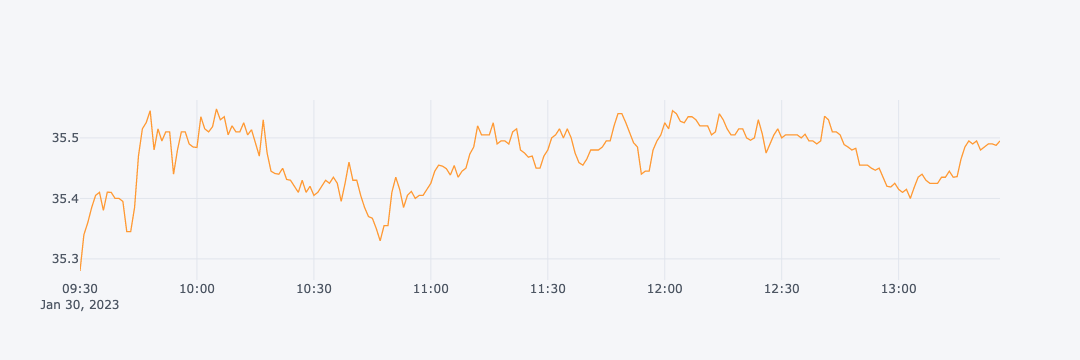

In [150]:
#Line Plot for single stock
BAC['Close'].iplot()

<AxesSubplot: xlabel='Bank Ticker', ylabel='Bank Ticker'>

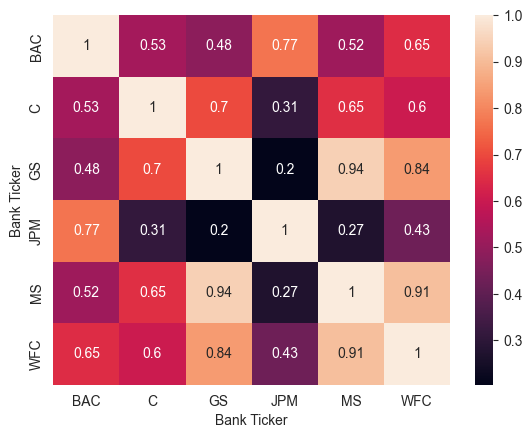

In [152]:
#Heatmap
sns.heatmap(data.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

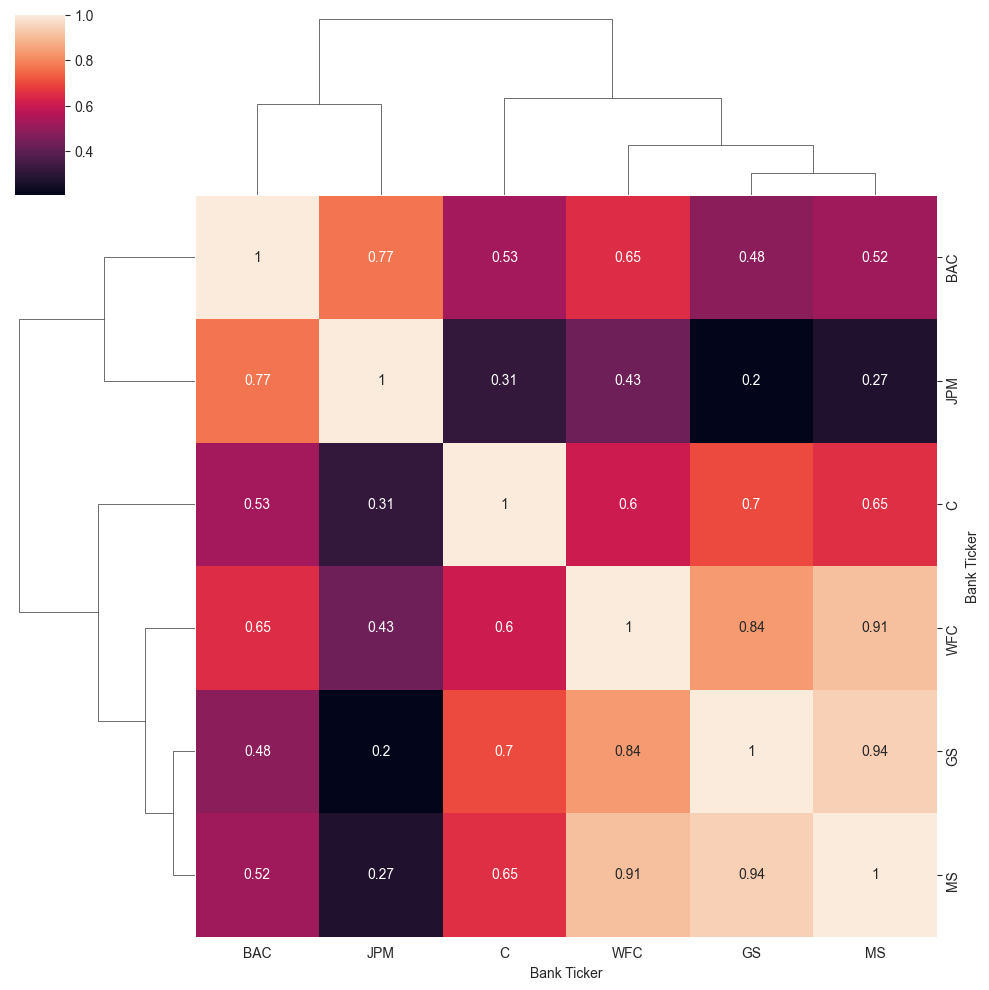

In [153]:
#Clustermap
sns.clustermap(data.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

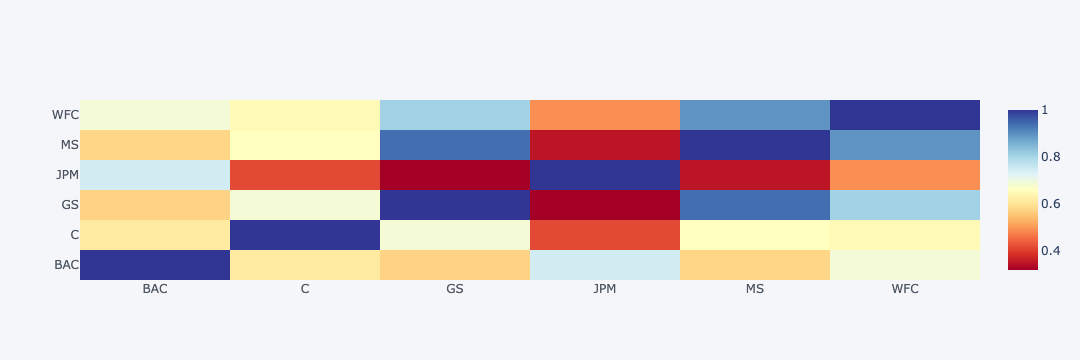

In [143]:
#More maps
corr = data.xs(key='Close', axis=1, level='Stock Info').corr()
corr.iplot(kind='heatmap', colorscale='rdylbu')

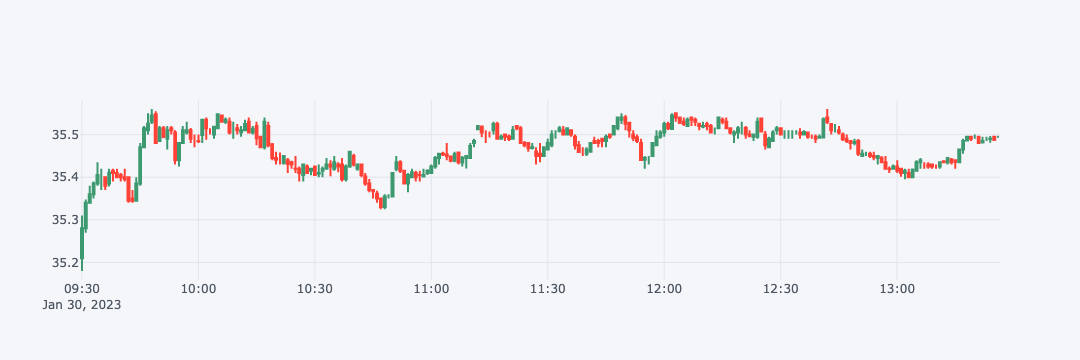

In [159]:
#Candle Plot
bac_candle = BAC[['Open', 'Close', 'High', 'Low']]
bac_candle.iplot(kind='candle')

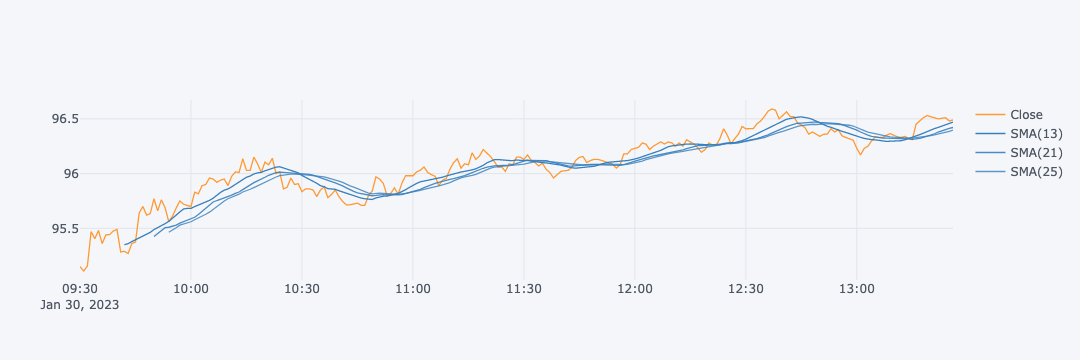

In [160]:
#Simple Moving Average Plot
MS['Close'].ta_plot(study='sma', periods=[13,21,25])

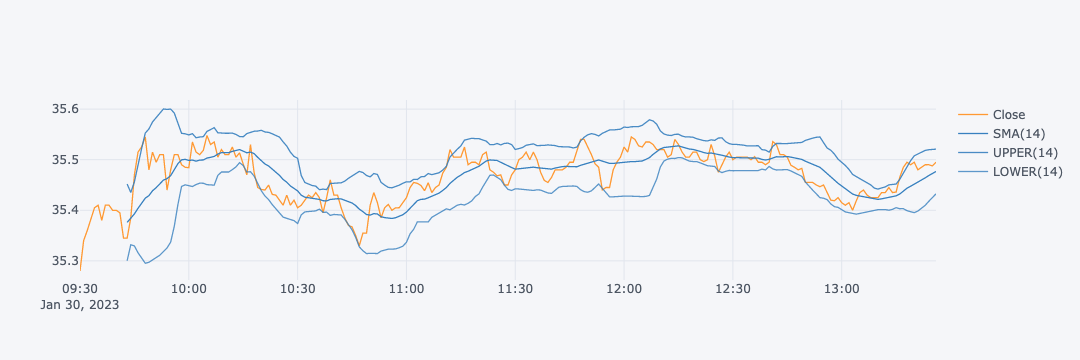

In [162]:
#Bollinger Band Plot
BAC['Close'].ta_plot(study='boll')